<a href="https://colab.research.google.com/github/mdnasiruddin733/ann-thesis/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steps to be follwed:**
> 

*   Import necessary packages
*   Load Data
*   Define Keras Model
*   Compile Keras Model
*   Fit Keras Model
*   Evaluate Keras Model
*   Make Predictions


















In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing necessary packages and modules**


In [ ]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


## **Loading data from our data.csv file** 

In [ ]:
url="/content/drive/MyDrive/datasets/data.csv"
df=pd.read_csv(url)
print(df)

     sand   silt   clay  ll  pl
0     5.0  59.04  35.96  34  21
1    11.1  66.33  22.58  31  20
2     7.3  70.17  22.52  36  24
3    11.1  64.04  24.87  38  23
4     1.6  79.00  19.39  39  28
..    ...    ...    ...  ..  ..
123  65.1  26.03   8.87  23  15
124   2.6  63.52  33.88  38  21
125   3.0  73.42  23.58  45  23
126  20.6  64.57  14.82  35  20
127  27.3  49.77  22.94  30  16

[128 rows x 5 columns]


## **Splitting dataset into input and output columns** 

In [ ]:

input_col=df.iloc[:,0:3]
output_col=df.iloc[:,3:5]

print(output_col)

     ll  pl
0    34  21
1    31  20
2    36  24
3    38  23
4    39  28
..   ..  ..
123  23  15
124  38  21
125  45  23
126  35  20
127  30  16

[128 rows x 2 columns]


# **Splitting Training and Testing Data**


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input_col,output_col,test_size=0.20)

## **Defining and compiling keras model** 

In [ ]:

#defining layers
model = Sequential()
model.add(Dense(units=15,kernel_initializer='normal', activation='relu'))
model.add(Dense(units=15,kernel_initializer='normal', activation='relu'))
model.add(Dense(units=15,kernel_initializer='normal', activation='relu'))
model.add(Dense(units=15,kernel_initializer='normal', activation='relu'))
model.add(Dense(2,activation="linear"))


# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mse"])
 
model.fit(x_train, y_train ,epochs = 400, batch_size=20, verbose=0)
y_true = np.array(y_test)
y_pred = np.array(model.predict(x_test))



In [ ]:
SSE=np.sum((y_test-y_pred)**2)
SST=np.sum((y_test-np.mean(y_pred))**2)
r_squared=1-(SSE/SST)
print(r_squared)
print((y_test-y_pred))

ll    0.816686
pl    0.916004
dtype: float64
            ll        pl
67   -2.822968 -3.738543
93    2.885643 -0.735754
23    0.631912  0.442776
49    0.077599 -2.949772
30   -2.593313  1.713890
87   -8.179340 -2.469110
6    -9.541183 -4.744078
18   -5.155121  2.941959
43   -8.166981 -4.382778
64   -6.384842 -3.805073
63   -2.585056  1.090559
5    -2.461861  3.394657
89   -3.292007  2.102270
66   -3.175228 -0.530378
121   4.526302 -7.011236
55    1.638126  3.605637
34   -1.250343 -1.109823
106   3.520351  3.306776
92   -2.267303 -3.834866
17   12.864380  5.713720
13    8.843346  0.781897
116   2.780296 -0.712580
39   -4.458702 -5.920874
71   -1.355442  0.054745
73    5.890385  1.964190
31   -3.529854 -0.260834


# **Predicting model**


In [ ]:
df=pd.DataFrame()
df["sand"]=x_test['sand']
df["silt"]=x_test['silt']
df["clay"]=x_test['clay']
df["ll"]=y_test['ll']
df["predicted_ll"]=model.predict(x_test)[:,0]
df["pl"]=y_test['pl']
df["predicted_pl"]=model.predict(x_test)[:,1]

print(df)


     sand   silt   clay  ll  predicted_ll  pl  predicted_pl
67    9.1  40.28  50.62  48     50.822968  24     27.738543
93    5.1  55.32  39.58  50     47.114357  25     25.735754
23   19.1  54.05  26.85  40     39.368088  22     21.557224
49    1.2  41.67  57.13  55     54.922401  27     29.949772
30   44.5  41.14  14.36  27     29.593313  18     16.286110
87    1.5  48.03  50.47  44     52.179340  26     28.469110
6     1.6  42.03  56.37  45     54.541183  25     29.744078
18    1.9  72.29  25.81  37     42.155121  26     23.058041
43    1.3  53.31  45.39  42     50.166981  23     27.382778
64   18.9  39.43  41.67  39     45.384842  21     24.805073
63    1.4  64.52  34.08  43     45.585056  26     24.909441
5     7.3  71.07  21.63  37     39.461861  25     21.605343
89   23.8  54.82  21.39  33     36.292007  22     19.897730
66    8.0  65.80  26.20  38     41.175228  22     22.530378
121  14.0  36.46  49.54  54     49.473698  20     27.011236
55   17.8  65.88  16.32  37     35.36187

**Graphs**


Text(0, 0.5, 'Plastic Limit')

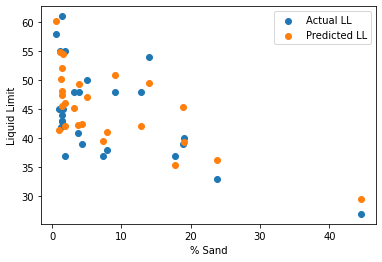

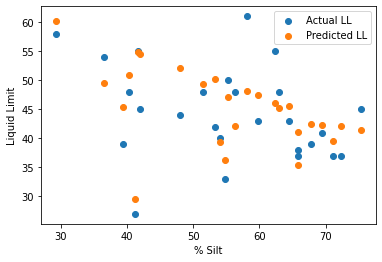

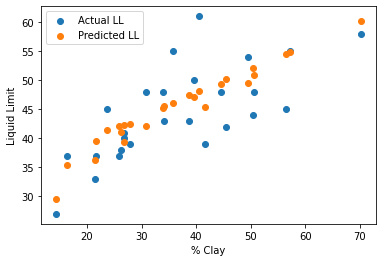

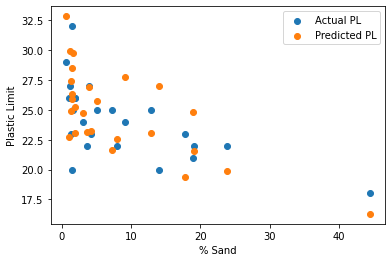

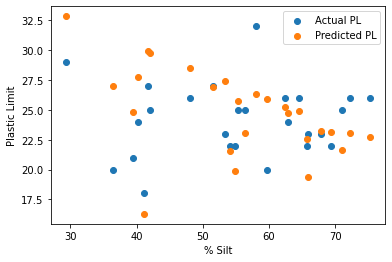

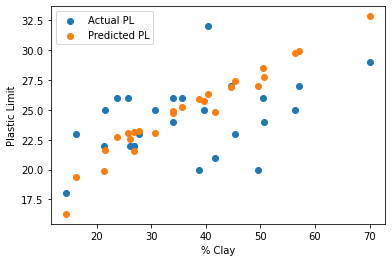

In [ ]:
import matplotlib.pyplot as plt

fig1,sand=plt.subplots()
sand.scatter(df['sand'],df['ll'])
sand.scatter(df['sand'],df['predicted_ll'])
sand.legend(("Actual LL","Predicted LL"))
sand.set_xlabel("% Sand")
sand.set_ylabel("Liquid Limit")

fig2,silt=plt.subplots()
silt.scatter(df['silt'],df['ll'])
silt.scatter(df['silt'],df['predicted_ll'])
silt.legend(("Actual LL","Predicted LL"))
silt.set_xlabel("% Silt")
silt.set_ylabel("Liquid Limit")

fig3,clay=plt.subplots()
clay.scatter(df['clay'],df['ll'])
clay.scatter(df['clay'],df['predicted_ll'])
clay.legend(("Actual LL","Predicted LL"))
clay.set_xlabel("% Clay")
clay.set_ylabel("Liquid Limit")


# Plastic Limit
fig1,sand=plt.subplots()
sand.scatter(df['sand'],df['pl'])
sand.scatter(df['sand'],df['predicted_pl'])
sand.legend(("Actual PL","Predicted PL"))
sand.set_xlabel("% Sand")
sand.set_ylabel("Plastic Limit")

fig2,silt=plt.subplots()
silt.scatter(df['silt'],df['pl'])
silt.scatter(df['silt'],df['predicted_pl'])
silt.legend(("Actual PL","Predicted PL"))
silt.set_xlabel("% Silt")
silt.set_ylabel("Plastic Limit")

fig3,clay=plt.subplots()
clay.scatter(df['clay'],df['pl'])
clay.scatter(df['clay'],df['predicted_pl'])
clay.legend(("Actual PL","Predicted PL"))
clay.set_xlabel("% Clay")
clay.set_ylabel("Plastic Limit")


